# **Purpose of the Model**: Predicting Transistor Current
This deep learning model is designed to predict the current `('Id' in uA)` of transistors based on several input parameters :
* vds (Continuous Value)
* L(um) (Continuous Value)
* W(um) (Continuous Value)
* drain_length(um) (Continuous Value)
* temperature (Continuous Value)
* vgs (Continuous Value)
* vsb (Continuous Value)
* corner (Categorical Value)

# Project Imports

In this section, we import the necessary libraries and modules for our project. Each library serves a specific purpose, such as data handling, model building, data preprocessing, visualization, and evaluation.

In [60]:
# Standard libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning libraries for model building and training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Data preprocessing and evaluation libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Data Loading

In this step, we load the dataset that contains the transistor parameters and corresponding current values `id(uA)`





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading Data

df =pd.read_csv("/content/drive/MyDrive/simulated_data_nmos.csv")

# Step 2: Data Inspection
Before proceeding further, let's take a quick look at the loaded data to understand its structure and contents.

In [5]:
# Display the first few rows of the dataset
df.head()

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,vth,v_pinch_off,lambda(um),...,gmb(uS),ro(Kohm),cgg(aF),cgs(aF),cgd(aF),cdd(aF),cdb(aF),cgb(aF),csb(aF),corner
0,-0.45,8.0,0.84,0.3,27.0,0.0,0.0,0.402306,-0.45,-0.011819,...,0.197561,3.181189e+06,34032.2445,-28204.1822,-69.122702,88.099279,-4468.20789,-5758.93958,-6638.15046,tt
1,-0.40,8.0,0.84,0.3,27.0,0.0,0.0,0.420865,-0.45,-0.011819,...,0.060563,6.552405e+06,31291.9536,-24561.0933,-64.892149,80.854021,-3789.70803,-6665.96815,-5628.27847,tt
2,-0.35,8.0,0.84,0.3,27.0,0.0,0.0,0.438375,-0.45,-0.011819,...,0.016120,1.321234e+07,28034.5839,-20243.4075,-60.510512,73.904890,-3083.99772,-7730.66594,-4577.23770,tt
3,-0.30,8.0,0.84,0.3,27.0,0.0,0.0,0.454991,-0.45,-0.011819,...,0.003967,3.684764e+07,24469.8762,-15523.2235,-56.971381,68.328120,-2370.67659,-8889.68129,-3514.23439,tt
4,-0.25,8.0,0.84,0.3,27.0,0.0,0.0,0.470835,-0.45,-0.011819,...,0.000886,1.229205e+08,20989.5482,-10919.3492,-55.582426,65.518741,-1701.53123,-10014.61660,-2516.57348,tt


In [7]:
#display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871488 entries, 0 to 871487
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   vds               871488 non-null  float64
 1   L(um)             871488 non-null  float64
 2   W(um)             871488 non-null  float64
 3   drain_length(um)  871488 non-null  float64
 4   temperature       871488 non-null  float64
 5   vgs               871488 non-null  float64
 6   vsb               871488 non-null  float64
 7   vth               871488 non-null  float64
 8   v_pinch_off       871488 non-null  float64
 9   lambda(um)        871488 non-null  float64
 10  id(uA)            871488 non-null  float64
 11  ig(aA)            871488 non-null  float64
 12  gm(uS)            871488 non-null  float64
 13  gmb(uS)           871488 non-null  float64
 14  ro(Kohm)          871488 non-null  float64
 15  cgg(aF)           871488 non-null  float64
 16  cgs(aF)           87

In [8]:
#Check for Nulls in the data
df.isnull().sum()

vds                 0
L(um)               0
W(um)               0
drain_length(um)    0
temperature         0
vgs                 0
vsb                 0
vth                 0
v_pinch_off         0
lambda(um)          0
id(uA)              0
ig(aA)              0
gm(uS)              0
gmb(uS)             0
ro(Kohm)            0
cgg(aF)             0
cgs(aF)             0
cgd(aF)             0
cdd(aF)             0
cdb(aF)             0
cgb(aF)             0
csb(aF)             0
corner              0
dtype: int64

# **Step 3**: Data Preprocessing
In this step,
we preprocess the dataset by :

*   separate the target variable from the feature set

*   removing  unnecessary columns


*   performing one-hot encoding for categorical variables.





**One-hot encoding** is essential to convert categorical features into a numerical format suitable for deep learning models.


In [16]:
#separate the target variable
target_label=df['id(uA)']

#removing unnecessary columns
df_pre=df.drop(df.iloc[:, 7:22].columns,axis=1)

In [41]:
target_label.describe()

count    871488.000000
mean        339.674855
std        1229.868653
min           0.000000
25%           0.000836
50%          12.420166
75%         122.021384
max       14979.728300
Name: id(uA), dtype: float64

In [12]:
#inspect the data
df_pre.head()

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,corner
0,-0.45,8.0,0.84,0.3,27.0,0.0,0.0,tt
1,-0.40,8.0,0.84,0.3,27.0,0.0,0.0,tt
2,-0.35,8.0,0.84,0.3,27.0,0.0,0.0,tt
3,-0.30,8.0,0.84,0.3,27.0,0.0,0.0,tt
4,-0.25,8.0,0.84,0.3,27.0,0.0,0.0,tt


In [15]:
#display dataset information
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871488 entries, 0 to 871487
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   vds               871488 non-null  float64
 1   L(um)             871488 non-null  float64
 2   W(um)             871488 non-null  float64
 3   drain_length(um)  871488 non-null  float64
 4   temperature       871488 non-null  float64
 5   vgs               871488 non-null  float64
 6   vsb               871488 non-null  float64
 7   corner            871488 non-null  object 
dtypes: float64(7), object(1)
memory usage: 53.2+ MB


In [19]:
#inspect the categorical values

df_pre['corner'] = pd.Categorical(df_pre.corner) #Convert 'corner' to a categorical variable.

category_names = df_pre['corner'].cat.categories  #Retrieve the category names from the categorical 'corner' column.

print(category_names) #print the categorys

Index(['ff', 'fs', 'sf', 'ss', 'tt'], dtype='object')


In [24]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df_pre['corner'].values.reshape(-1,1)).toarray() # Fit and transform the 'corner' column

encoded_column = encoder.get_feature_names_out(['corner']) # Get the feature names for one-hot encoded columns

one_hot_encoded_frame = pd.DataFrame(encoded_data, columns=encoded_column) # Create new  DataFrame with the one-hot encoded 'corner' column with feature names

df_pre = df_pre.drop(['corner'], axis=1) # Drop the original 'corner' column

df_pre =df_pre.join(one_hot_encoded_frame) # Join the one-hot encoded columns with the data set again (df_pre)





In [25]:
#inspect the data after The change
df_pre.head()

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,corner_ff,corner_fs,corner_sf,corner_ss,corner_tt
0,-0.45,8.0,0.84,0.3,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.40,8.0,0.84,0.3,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.35,8.0,0.84,0.3,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.30,8.0,0.84,0.3,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.25,8.0,0.84,0.3,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Step 4**: Data Splitting - Train, Validation, and Test Sets

1. **Training Set**: Used to train the machine learning model.
2. **Validation Set**: Used to fine-tune hyperparameters and monitor model performance during training.
3. **Test Set**: Reserved for final model evaluation, and it simulates real-world, unseen data.


In [88]:
# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(df_pre,target_label, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


In [89]:
#Display the shape of the data after split

print("Training data shape")
print("X_train shape : ",X_train.shape)#training data
print("y_train shape : ",y_train.shape)#training label

print("\nTest data shape")
print("X_test shape : ",X_test.shape)#Test data
print("X_test shape : ",X_test.shape)#Test label

print("\nValidation data shape")
print("X_test shape : ",X_test.shape)#Validation data
print("X_test shape : ",X_test.shape)#Validation label



Training data shape
X_train shape :  (610041, 12)
y_train shape :  (610041,)

Test data shape
X_test shape :  (130724, 12)
X_test shape :  (130724, 12)

Validation data shape
X_test shape :  (130724, 12)
X_test shape :  (130724, 12)


# **Step 5**: Model Creation

In this step, we'll create our Deep Learning model for predicting transistor current based on the prepared dataset. We'll design a deep neural network model using TensorFlow and Keras.


##  Explanation of the Architecture:


The model starts with a dense layer with 256 neurons and ReLU activation.
A dropout layer with a dropout rate of 0.2 is ***added to prevent overfitting***.
Followed by another dense layer with 128 neurons and ReLU activation.
Another dropout layer with a dropout rate of 0.2 is added.
Additionally, a regularization technique known as L1 regularization with a strength of 0.001 is applied to the weights of these dense layers. L1 regularization encourages sparsity in the model's weights, **helping to prevent overfitting.**
A dense layer with 8 neurons and ReLU activation is added.
Finally, the output layer consists of a single neuron with linear (identity) activation, suitable for regression tasks. the output layer consists of a single neuron with linear (identity) activation, suitable for regression tasks.


**Regression Task:** This is a regression problem since it aims to predict continuous transistor current` ('Id')` based on input parameters.

In [87]:
model=Sequential()
model.add(Dense(256, activation="relu",kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu",kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dense(1,activation="relu"))


# **Step 6**: Model Compilation and train

After defining the architecture of our neural network model, we compile it with the following configurations:

## Model Compilation

We use the Adam optimizer and mean squared error (MSE) as the loss function for our regression task. Additionally, we track the mean absolute error (MAE) as a metric to monitor model performance during training.


## Model train
To train our neural network model efficiently and prevent overfitting, we employ the EarlyStopping callback. This helps monitor the training process and stop it when certain conditions are met.



In [90]:
model.compile(optimizer="adam",  loss='mean_squared_error', metrics=['mae'])

In [91]:
# Define the EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor MAPE
    patience=15,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights to the best observed during training
)


In [92]:
history = model.fit(x= X_train, y= y_train, batch_size=128, epochs=300, validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/300
4766/4766 [==============================] - 27s 5ms/step - loss: 310178.7500 - mae: 159.8990 - val_loss: 123866.7188 - val_mae: 87.3335
Epoch 2/300
4766/4766 [==============================] - 24s 5ms/step - loss: 129014.0547 - mae: 96.1188 - val_loss: 88826.5078 - val_mae: 73.4801
Epoch 3/300
4766/4766 [==============================] - 24s 5ms/step - loss: 87909.6172 - mae: 79.6775 - val_loss: 35343.8477 - val_mae: 47.2274
Epoch 4/300
4766/4766 [==============================] - 31s 6ms/step - loss: 49458.3633 - mae: 63.2341 - val_loss: 13741.2871 - val_mae: 36.8421
Epoch 5/300
4766/4766 [==============================] - 25s 5ms/step - loss: 33549.7422 - mae: 55.2479 - val_loss: 15613.6797 - val_mae: 39.8792
Epoch 6/300
4766/4766 [==============================] - 23s 5ms/step - loss: 27735.3867 - mae: 51.2001 - val_loss: 7477.8281 - val_mae: 30.3114
Epoch 7/300
4766/4766 [==============================] - 27s 6ms/step - loss: 25234.3516 - mae: 49.3541 - val_loss: 11797

In [101]:
model.save('Final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# visualizes Training and Validation Loss Over Time





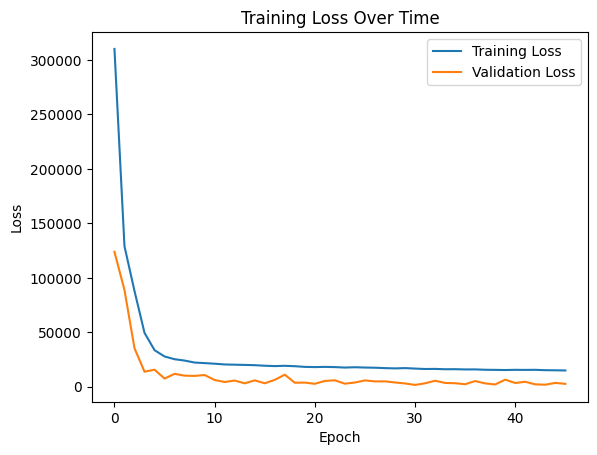

In [94]:
# Plot the Training and Validation Loss Over Time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Over Time')
plt.show()

# **Final Step** : Evalute The model
We evaluate The model on the test set

In [97]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)

# Print the test loss and MAE
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")


4086/4086 [==============================] - 6s 1ms/step - loss: 1640.1414 - mae: 14.7597
Test Loss: 1640.141357421875
Test MAE: 14.759695053100586


In [98]:
y_pred = model.predict(X_test)

4086/4086 [==============================] - 5s 1ms/step


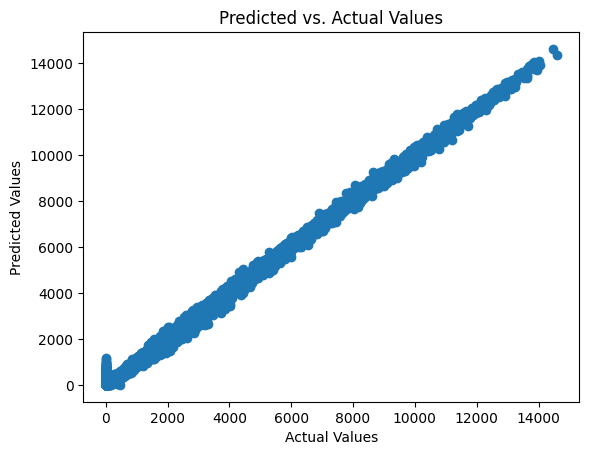

In [99]:
#Predicted vs. Actual Scatter Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

# **Conclusion**
Looking at the scatter plot and other graphs, it's clear that our model's predictions are very close to the actual values. Our main goal of minimizing errors in predicting transistor current `Id(uA)` has been achieved. These graphs show that our model is good at making accurate predictions for transistor current based on the given parameters.
